In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import lightgbm as lgb
import warnings

In [ ]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=498a5f0b315a04fc922f95f62bb0c6cd9048b65e126c11522ce374bbcafd76ba
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

In [ ]:
pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.7/555.7 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.7/230.7 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 19.6 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import featuretools as ft

In [ ]:
df = pd.read_csv("mid.csv",encoding ='UTF-8')

In [ ]:
df = df.drop(["種類","都道府県名"], axis=1)

In [ ]:
df = df.drop(["今後の利用目的", "取引の事情等"], axis=1)

In [ ]:
es = ft.EntitySet(id='example') 

es.add_dataframe(dataframe_name='locations', 
                         dataframe=df, 
                         index='name')  
                         
trans_primitives=['add_numeric', 'multiply_numeric']
agg_primitives=[]

feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name='locations',
                                      trans_primitives=trans_primitives,
                                      agg_primitives=agg_primitives,
                                      max_depth=1)

/usr/local/lib/python3.8/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(


In [ ]:
feature_matrix.shape

(86538, 57)

In [ ]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86538 entries, 0 to 86537
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   市区町村名                 86538 non-null  category
 1   地区名                   86535 non-null  category
 2   最寄駅：名称                86393 non-null  category
 3   最寄駅：距離（分）             84807 non-null  Int64   
 4   取引価格（総額）              86538 non-null  int64   
 5   間取り                   81421 non-null  category
 6   面積（㎡）                 86538 non-null  float64 
 7   建物の構造                 85427 non-null  category
 8   用途                    78688 non-null  category
 9   都市計画                  85829 non-null  category
 10  建ぺい率（％）               85367 non-null  Int64   
 11  容積率（％）                85367 non-null  Int64   
 12  取引時点                  86538 non-null  float64 
 13  改装                    75347 non-null  category
 14  築年数                   85649 non-null  Int64   
 15  取引

In [ ]:
feature_matrix.dtypes

市区町村名                   category
地区名                     category
最寄駅：名称                  category
最寄駅：距離（分）                  Int64
取引価格（総額）                   int64
間取り                     category
面積（㎡）                    float64
建物の構造                   category
用途                      category
都市計画                    category
建ぺい率（％）                    Int64
容積率（％）                     Int64
取引時点                     float64
改装                      category
築年数                        Int64
取引価格（総額） + 取引時点          float64
取引価格（総額） + 容積率（％）        float64
取引価格（総額） + 建ぺい率（％）       float64
取引価格（総額） + 最寄駅：距離（分）     float64
取引価格（総額） + 築年数           float64
取引価格（総額） + 面積（㎡）         float64
取引時点 + 容積率（％）            float64
取引時点 + 建ぺい率（％）           float64
取引時点 + 最寄駅：距離（分）         float64
取引時点 + 築年数               float64
取引時点 + 面積（㎡）             float64
容積率（％） + 建ぺい率（％）         float64
容積率（％） + 最寄駅：距離（分）       float64
容積率（％） + 築年数             float64
容積率（％） + 面積（㎡）           float64
建ぺい率（％） + 

In [ ]:
feature_matrix = feature_matrix.drop(["取引価格（総額） + 取引時点",
                                      "取引価格（総額） + 容積率（％）",
                                      "取引価格（総額） + 建ぺい率（％）",
                                      "取引価格（総額） + 最寄駅：距離（分）",
                                      "取引価格（総額） + 築年数",
                                      "取引価格（総額） + 面積（㎡）",  
                                      "取引価格（総額） * 取引時点",
                                      "取引価格（総額） * 容積率（％）",
                                      "取引価格（総額） * 建ぺい率（％）",
                                      "取引価格（総額） * 最寄駅：距離（分）",
                                      "取引価格（総額） * 築年数",
                                      "取引価格（総額） * 面積（㎡）" 
                                      ], axis=1)

In [ ]:
feature_matrix.info()

In [ ]:
def data_preprocess(df):
  cat_fetures = ["市区町村名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "都市計画", "改装"]
  for col in cat_fetures:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(df[col])
    lbl.transform(df[col])
    df[col] = lbl.transform(df[col])
  return df

feature_matrix =data_preprocess(feature_matrix)

In [ ]:
feature_matrix["最寄駅：距離（分）"] = feature_matrix["最寄駅：距離（分）"].astype(float)
feature_matrix["建ぺい率（％）"] = feature_matrix["建ぺい率（％）"].astype(float)
feature_matrix["容積率（％）"] = feature_matrix["容積率（％）"].astype(float)
feature_matrix["築年数"] = feature_matrix["築年数"].astype(float)

In [ ]:
X = feature_matrix.drop(["取引価格（総額）"], axis=1)
y = feature_matrix["取引価格（総額）"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=1000,
    )
    
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print("平均二乗誤差 (MSE): ", mean_squared_error(y_test, y_pred)) 
print("二乗平均平方根誤差(RMSE): ", mean_squared_error(y_test, y_pred, squared=False)) 
print("平均絶対誤差 (MAE): ", mean_absolute_error(y_test, y_pred)) 
print("決定係数(R2): ", r2_score(y_test, y_pred)) 
print("平均絶対誤差率(MAPE): ", np.mean(np.abs((y_pred - y_test) / y_test)) * 100) 

平均二乗誤差 (MSE):  11582633831816.389
二乗平均平方根誤差(RMSE):  3403326.877015546
平均絶対誤差 (MAE):  2354495.7853116845
決定係数(R2):  0.8743378058332133
平均絶対誤差率(MAPE):  128.7027955459018


In [ ]:
print('学習データに対する決定係数(R2): {}'.format(model.score(X_train, y_train)))
print('テストデータに対する決定係数(R2): {}'.format(model.score(X_test, y_test)))

学習データに対する決定係数(R2): 0.9331375546303661
テストデータに対する決定係数(R2): 0.8743378058332133


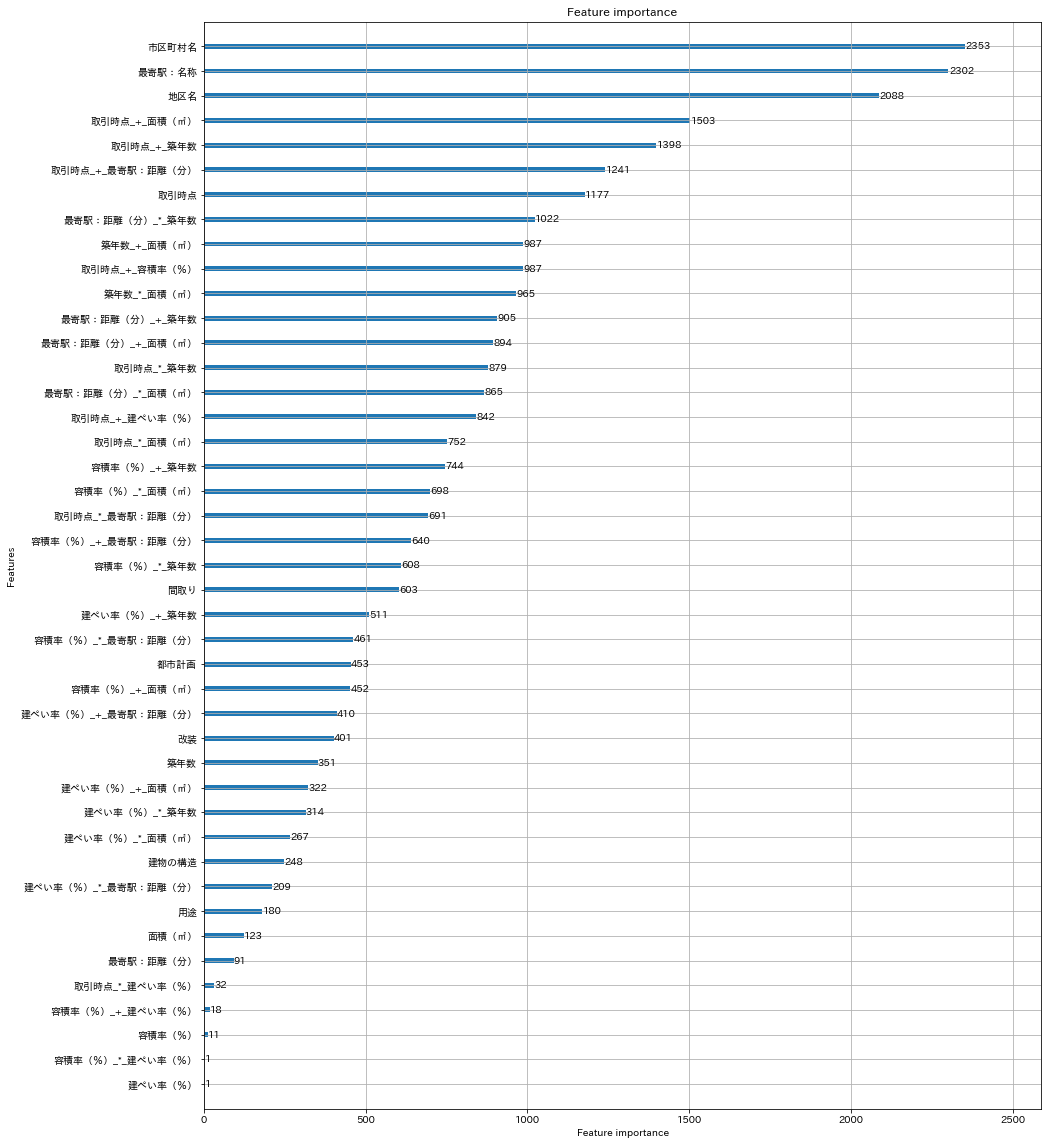

In [ ]:
lgb.plot_importance(model, importance_type='split', figsize=(15,20))
plt.show()

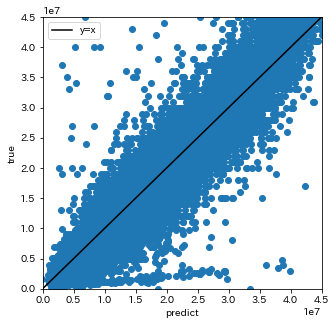

In [ ]:
plt.figure(figsize=(5, 5)) 
plt.plot([0,y_test.max()], [0,y_test.max()], label="y=x", color="black")
plt.scatter(y_pred, y_test)
plt.legend()
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())
plt.xlabel("predict")
plt.ylabel("true")
plt.show()

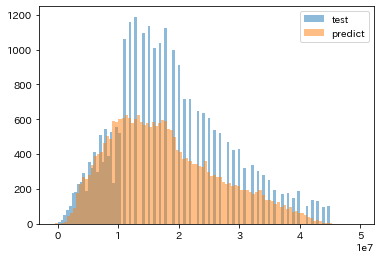

In [ ]:
plt.hist(y_test, bins=100, alpha=0.5, label="test")
plt.hist(y_pred, bins=100, alpha=0.5, label="predict")
plt.legend()
plt.show()